<a href="https://colab.research.google.com/github/fg0611/data-professionalization/blob/main/data-science/coder_data_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/00 DEV CODING/00 CoderHouse/data science/project/datasets

/content/drive/MyDrive/00 DEV CODING/00 CoderHouse/data science/project/datasets


In [ ]:
ls

agricultural-area-per-capita.csv
agricultural-area-per-capita.gsheet
arable-land-use-per-person.csv
fao_food_production.csv
fao_food_production.gsheet
food-emissions-supply-chain.csv
ghg_1000kcal.csv
ghg_food_23.csv
land_use_by_crop_type_fao_2017.csv
land-use-kcal.csv
protein/
protein_food_content.xlsx
total-agricultural-area-over-the-long-term.csv
water_kcal.csv
water_tonne.csv


In [ ]:
## ops libs
import pandas as pd
import pandas_profiling
import numpy as np
## vis libs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Our world population is expected to grow from 7.3 billion today to 9.7 billion in the year 2050. Finding solutions for feeding the growing world population has become a hot topic for food and agriculture organizations, entrepreneurs and philanthropists. These solutions range from changing the way we grow our food to changing the way we eat. To make things harder, the world's climate is changing and it is both affecting and affected by the way we grow our food – agriculture.
This dataset provides an insight on our worldwide food production - focusing on a comparison between food produced for human consumption and feed produced for animals.

https://www.kaggle.com/datasets/dorbicycle/world-foodfeed-production

In [ ]:
fao_food = pd.read_csv('fao_food_production.csv', sep=';', encoding='latin')

In [ ]:
fao_food.head()

,Country,Item,Type,Unit,1961,1962,1963,1964,1965,1966,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Wheat and products,Food,1000 tonnes,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes,183.0,183.0,182.0,220.0,220.0,195.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,Afghanistan,Barley and products,Feed,1000 tonnes,76.0,76.0,76.0,76.0,76.0,75.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,Afghanistan,Barley and products,Food,1000 tonnes,237.0,237.0,237.0,238.0,238.0,237.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,Afghanistan,Maize and products,Feed,1000 tonnes,210.0,210.0,214.0,216.0,216.0,216.0,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [ ]:
fao_food.shape

(21477, 57)

In [ ]:
## There are more repeated Item names than the number of countries which is 195, this is because of "food and feed type" 
## but it might be also because of repeated rows data. Adding to that there have been countries that appeared, disappeared or even splitted since 1960. 
## For example the URSS had these 15 countries:
## Armenia, Azerbaijan, Belarus, Estonia, Georgia, Kazakhstan, Kyrgyzstan, Latvia, Lithuania, Moldovia, Russia, Tajikistan, Turkmenistan, Ukraine, and Uzbekistan
item_frec = fao_food['Item'].value_counts()
item_frec[:10]

Milk - Excluding Butter     558
Eggs                        360
Cereals - Excluding Beer    347
Fish; Seafood               337
Maize and products          333
Pelagic Fish                328
Oilcrops                    314
Starchy Roots               309
Cereals; Other              308
Animal fats                 280
Name: Item, dtype: int64

In [ ]:
## there are duplicated rows
milk = fao_food['Item'].str.contains('Milk - Excluding Butter')
fao_food[milk]

,Country,Item,Type,Unit,1961,1962,1963,1964,1965,1966,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
56,Afghanistan,Milk - Excluding Butter,Feed,1000 tonnes,28.0,28.0,32.0,32.0,36.0,40.0,...,121.0,117.0,112.0,116.0,113.0,115.0,114.0,114.0,121,123
57,Afghanistan,Milk - Excluding Butter,Food,1000 tonnes,531.0,535.0,597.0,611.0,670.0,695.0,...,1650.0,1590.0,1517.0,1622.0,1591.0,1629.0,1686.0,1676.0,1895,1901
79,Afghanistan,Milk - Excluding Butter,Feed,1000 tonnes,28.0,28.0,32.0,32.0,36.0,40.0,...,121.0,117.0,112.0,116.0,113.0,115.0,114.0,114.0,121,123
80,Afghanistan,Milk - Excluding Butter,Food,1000 tonnes,531.0,535.0,597.0,611.0,670.0,695.0,...,1650.0,1590.0,1517.0,1622.0,1591.0,1629.0,1686.0,1676.0,1895,1901
165,Albania,Milk - Excluding Butter,Feed,1000 tonnes,3.0,3.0,4.0,4.0,4.0,4.0,...,95.0,96.0,99.0,90.0,93.0,94.0,96.0,99.0,99,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21351,Zambia,Milk - Excluding Butter,Food,1000 tonnes,43.0,43.0,41.0,46.0,50.0,56.0,...,88.0,88.0,88.0,95.0,98.0,97.0,112.0,113.0,129,141
21440,Zimbabwe,Milk - Excluding Butter,Feed,1000 tonnes,12.0,12.0,12.0,11.0,11.0,11.0,...,21.0,21.0,21.0,21.0,21.0,23.0,25.0,25.0,30,31
21441,Zimbabwe,Milk - Excluding Butter,Food,1000 tonnes,230.0,232.0,234.0,238.0,234.0,231.0,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21471,Zimbabwe,Milk - Excluding Butter,Feed,1000 tonnes,12.0,12.0,12.0,11.0,11.0,11.0,...,21.0,21.0,21.0,21.0,21.0,23.0,25.0,25.0,30,31


In [ ]:
## removing duplicated rows
fao_food['joined'] = fao_food['Country'] + fao_food['Item'] + fao_food['Type']
fao_food.drop_duplicates(subset='joined', keep='first', inplace=True)
del fao_food['joined']
milk = fao_food['Item'].str.contains('Milk - Excluding Butter')
fao_food[milk]

,Country,Item,Type,Unit,1961,1962,1963,1964,1965,1966,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
56,Afghanistan,Milk - Excluding Butter,Feed,1000 tonnes,28.0,28.0,32.0,32.0,36.0,40.0,...,121.0,117.0,112.0,116.0,113.0,115.0,114.0,114.0,121,123
57,Afghanistan,Milk - Excluding Butter,Food,1000 tonnes,531.0,535.0,597.0,611.0,670.0,695.0,...,1650.0,1590.0,1517.0,1622.0,1591.0,1629.0,1686.0,1676.0,1895,1901
165,Albania,Milk - Excluding Butter,Feed,1000 tonnes,3.0,3.0,4.0,4.0,4.0,4.0,...,95.0,96.0,99.0,90.0,93.0,94.0,96.0,99.0,99,101
166,Albania,Milk - Excluding Butter,Food,1000 tonnes,163.0,166.0,171.0,177.0,182.0,188.0,...,919.0,933.0,950.0,879.0,901.0,900.0,920.0,950.0,948,964
291,Algeria,Milk - Excluding Butter,Food,1000 tonnes,523.0,496.0,443.0,485.0,507.0,558.0,...,3964.0,4010.0,4193.0,4268.0,4309.0,4829.0,4922.0,5702.0,5602,5549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21200,Yemen,Milk - Excluding Butter,Food,1000 tonnes,133.0,138.0,141.0,149.0,160.0,155.0,...,726.0,760.0,760.0,849.0,812.0,984.0,738.0,854.0,1050,1073
21319,Zambia,Milk - Excluding Butter,Feed,1000 tonnes,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,5
21320,Zambia,Milk - Excluding Butter,Food,1000 tonnes,43.0,43.0,41.0,46.0,50.0,56.0,...,88.0,88.0,88.0,95.0,98.0,97.0,112.0,113.0,129,141
21440,Zimbabwe,Milk - Excluding Butter,Feed,1000 tonnes,12.0,12.0,12.0,11.0,11.0,11.0,...,21.0,21.0,21.0,21.0,21.0,23.0,25.0,25.0,30,31


In [ ]:
# List of dataset's years, for later
years = fao_food.columns[fao_food.columns.get_loc('1961'):]
years

Index(['1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013'],
      dtype='object')

In [ ]:
## finding missing values (No Dropping)
# print(pd.isnull(fao_food['Country']).sum(axis=1))
fao_food.columns[fao_food.isnull().any()]

Index(['1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011'],
      dtype='object')

In [ ]:
## Creating a new dataframe from fao_food which contain only 2013's data and consumed by humans
fao_food_2013 = fao_food[['Item', 'Type', '2013']]
fao_food_2013 = fao_food_2013.query("Type == 'Food'").groupby(['Item'], as_index=False).sum()
fao_food_2013.columns = ['Item','Totals in 1000 tons']
fao_food_2013.head()


,Item,Totals in 1000 tons
0,Alcoholic Beverages,260701
1,Animal fats,23231
2,Apples and products,70671
3,Aquatic Animals; Others,1249
4,Aquatic Plants,14307


In [ ]:
## Creating a new dataframe from fao_food which contain only 2013's data and consumed by non-humans
fao_food_2013_feed = fao_food[['Item', 'Type', '2013']]
fao_food_2013_feed = fao_food_2013_feed.query("Type == 'Feed'").groupby(['Item'], as_index=False).sum()
fao_food_2013_feed.columns = ['Item','Totals in 1000 tons']
fao_food_2013_feed.head()

,Item,Totals in 1000 tons
0,Animal fats,1955
1,Apples and products,663
2,Aquatic Plants,312
3,Aquatic Products; Other,312
4,Bananas,871


In [ ]:
# Loading dataset with Protein per 100gr of Product obtained by Food in 2013
# protein_food_content.xlsx
protein = pd.read_excel('protein_food_content.xlsx')
# new col with ton of protein per ton of food type 
#  Xgr Prot/100gr Food * (100,000,000 gr Food / 1 ton Food) * (1 ton Prot / 100,000,000 gr Prot)
protein['prot(ton) per food(ton)'] = protein['Protein content (g) per 100gr']/100
protein.head()

,Item,Protein content (g) per 100gr,prot(ton) per food(ton)
0,Chicken,32.0,0.320
1,poultry,32.0,0.320
2,pig,31.6,0.316
3,Pork,31.6,0.316
4,bovine,31.0,0.310


In [ ]:
fao_food_2013['produced (tons)'] = fao_food_2013['Totals in 1000 tons']*1000
fao_food_2013.drop(['Totals in 1000 tons'], axis=1, inplace=True)
fao_food_2013['produced protein (tons)'] = 0
fao_food_2013.head()

,Item,produced (tons),produced protein (tons)
0,Alcoholic Beverages,260701000,0
1,Animal fats,23231000,0
2,Apples and products,70671000,0
3,Aquatic Animals; Others,1249000,0
4,Aquatic Plants,14307000,0


In [ ]:
# to lowercase both dataframes Item cols
fao_food_2013["Item"] = fao_food_2013["Item"].str.lower()
protein["Item"] = protein["Item"].str.lower()
fao_food_2013.shape 

(115, 3)

In [ ]:
# since sugars and oils don't contribute nor have sufficient protein value to human intake nutrition, they will be treated separately for further analysis
fao_food_2013_oil = fao_food_2013[fao_food_2013['Item'].str.contains('oil')]
fao_food_2013_oil.drop('produced protein (tons)', inplace=True, axis=1)

fao_food_2013_sugar = fao_food_2013[fao_food_2013['Item'].str.contains('sugar')]
fao_food_2013_sugar.drop('produced protein (tons)', inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
fao_food_2013_sugar.head()

,Item,produced (tons)
96,sugar & sweeteners,172919000
97,sugar (raw equivalent),143648000
98,sugar crops,32246000
99,sugar beet,57000
100,sugar cane,32189000


In [ ]:
fao_food_2013_oil.head()

,Item,produced (tons)
21,coconut oil,2022000
25,cottonseed oil,3940000
32,fish; body oil,67000
33,fish; liver oil,12000
40,groundnut oil,3848000


In [ ]:
for i in fao_food_2013.index:
    for iProt in protein.index:
      foodName = fao_food_2013["Item"].iloc[i]
      if (protein['Item'].iloc[iProt] in foodName):
        fao_food_2013['produced protein (tons)'].iloc[i] = fao_food_2013['produced (tons)'].iloc[i] * protein['prot(ton) per food(ton)'].iloc[iProt]
    #   else:
    #     fao_food_2013.drop(i)-

# fao_food_2013.drop(fao_food_2013[fao_food_2013['Item'].str.contains('oil')].index, inplace=True)
# fao_food_2013.drop(fao_food_2013[fao_food_2013['Item'].str.contains('sugar')].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
fao_food_2013.sort_values(by='produced protein (tons)', ascending=False, inplace=True)
fao_food_2013 = fao_food_2013[fao_food_2013['produced protein (tons)'] != 0]

In [ ]:
fao_food_2013.head()

,Item,produced (tons),produced protein (tons)
112,wheat and products,457824000,55854528.0
83,rice (milled equivalent),377286000,41124174.0
73,pigmeat,112100000,35423600.0
78,poultry meat,104871000,33558720.0
34,fish; seafood,132832000,31879680.0


In [ ]:
fao_food_2013.shape

(43, 3)

In [ ]:
cd /content/drive/MyDrive/00 DEV CODING/00 CoderHouse/data science/project/datasets/protein/mod

/content/drive/MyDrive/00 DEV CODING/00 CoderHouse/data science/project/datasets/protein/mod


In [ ]:
ls

ghg_protein.csv  land_protein.csv  water_protein.csv


In [ ]:
# reading the data of land required in km2 per 100gr of protein
## adding a col that shows same data in km2 of land per ton of protein
# X(m2)/100gr(1000gr/1kg*1000kg/tn)*(1 km2 / 1 million m2) = km2_land/tn_protein
land_protein = pd.read_csv('land_protein.csv')
land_protein.drop(["Code", "Year"], axis=1, inplace=True, errors='ignore')
land_protein['land(km2)_per_protein(ton)'] = (land_protein.iloc[:, 1] * 0.01).round(2)
land_protein.sort_values(["food"], inplace=True)
land_protein.head()

,food,m2_per_100gr_of_protein,land(km2)_per_protein(ton)
0,Apple,21.000000,0.21
1,Banana,21.444444,0.21
3,Beef,163.595787,1.64
4,Beef (dairy herd),21.904762,0.22
6,Brassica,5.000000,0.05


In [ ]:
# reading the data of lts per 100gr of protein
## adding a col that shows same data in lts per ton of protein, X(lts)/100gr(1000gr/1kg*1000kg/tn)*(1 tn_water / 1000 lt_water) = tn_water/tn_protein
water_protein = pd.read_csv('water_protein.csv')
water_protein.drop(["Code", "Year"], axis=1, inplace=True, errors='ignore')
arr_of_cols = water_protein.columns
water_protein.rename(columns = {arr_of_cols[1]: 'lts_per_100gr_of_protein'}, inplace=True)
water_protein['water(ton)_per_protein(ton)'] = (water_protein.iloc[:, 1] * 10).round(2)
water_protein.sort_values(["food"], ascending=True)
water_protein.head()

,food,lts_per_100gr_of_protein,water(ton)_per_protein(ton)
0,Apple,6003.333333,60033.33
1,Banana,1272.222222,12722.22
2,bovine,727.783350,7277.83
3,Beef,727.783350,7277.83
4,Grape,4196.000000,41960.00


In [ ]:
# reading the data of kgs of ghg (co2e) per 100gr of protein
## adding a col that shows same data in kgs of ghg per ton of protein 
## resulting mostly in thousands of kgs of ghg
ghg_protein = pd.read_csv('ghg_protein.csv')
ghg_protein.drop(["Code", "Year"], axis=1, inplace=True, errors='ignore')
ghg_protein['ghg(ton)_per_protein(ton)'] = (ghg_protein.iloc[:, 1] * 10).round(2)
ghg_protein.sort_values(["food"], ascending=True)
ghg_protein.head()

,food,ghg_kg_per_100gr_protein,ghg(ton)_per_protein(ton)
0,Apple,14.333333,143.33
1,Banana,9.555556,95.56
2,bovine,49.889669,498.90
3,Beef,49.889669,498.90
4,Grape,15.300000,153.00


In [ ]:
land_protein["food"] = land_protein["food"].str.lower()
water_protein["food"] = water_protein["food"].str.lower()
ghg_protein["food"] = ghg_protein["food"].str.lower()

In [ ]:
fao_food_2013.head()

,Item,produced (tons),produced protein (tons)
112,wheat and products,457824000,55854528.0
83,rice (milled equivalent),377286000,41124174.0
73,pigmeat,112100000,35423600.0
78,poultry meat,104871000,33558720.0
34,fish; seafood,132832000,31879680.0


In [ ]:
## reassign dataframe index and create new cols for calculated values 
nrows = fao_food_2013.shape[0]
fao_food_2013.index = range(nrows)
fao_food_2013['land(km2)'] = 0
fao_food_2013['water(ton)'] = 0
fao_food_2013['ghg(ton)'] = 0
fao_food_2013.head(2)

,Item,produced (tons),produced protein (tons),land(km2),water(ton),ghg(ton)
0,wheat and products,457824000,55854528.0,0,0,0
1,rice (milled equivalent),377286000,41124174.0,0,0,0


In [ ]:
for i in fao_food_2013.index:
  for iProt in land_protein.index:
    # print(fao_food_2013['Item'][i])
    foodName = fao_food_2013['Item'][i]
    if (land_protein['food'].iloc[iProt] in foodName):
      # display(fao_food_2013.loc[[i]])
      # display(land_protein.loc[[iProt]])
      fao_food_2013['land(km2)'].iloc[i] = fao_food_2013['produced protein (tons)'].iloc[i] * land_protein['land(km2)_per_protein(ton)'].iloc[iProt]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
for i in fao_food_2013.index:
  for iProt in water_protein.index:
    foodName = fao_food_2013['Item'][i]
    if (water_protein['food'].iloc[iProt] in foodName):
      fao_food_2013['water(ton)'].iloc[i] = (fao_food_2013['produced protein (tons)'].iloc[i] * water_protein['water(ton)_per_protein(ton)'].iloc[iProt]).round(2)

In [ ]:
for i in fao_food_2013.index:
  for iProt in ghg_protein.index:
    foodName = fao_food_2013['Item'][i]
    if (ghg_protein['food'].iloc[iProt] in foodName):
      fao_food_2013['ghg(ton)'].iloc[i] = fao_food_2013['produced protein (tons)'].iloc[i] * ghg_protein['ghg(ton)_per_protein(ton)'].iloc[iProt]

In [ ]:
# checking the new columns
fao_food_2013.head()

,Item,produced (tons),produced protein (tons),land(km2),water(ton),ghg(ton)
0,wheat and products,457824000,55854528.0,1675635.84,2.964412e+11,7.188478e+08
1,rice (milled equivalent),377286000,41124174.0,1644966.96,1.302304e+12,2.577663e+09
2,pigmeat,112100000,35423600.0,3896596.00,3.931626e+11,2.695027e+09
3,poultry meat,104871000,33558720.0,2349110.40,1.278795e+11,1.912511e+09
4,fish; seafood,132832000,31879680.0,0.00,0.000000e+00,0.000000e+00


How many harvests are produced per year?
What is the coarse crop and what is the fine crop?

In the fields of Argentina, the following crops are mainly planted: soybeans, wheat, corn, sorghum, sunflower. These 4 crops concentrate more than 90% of the area planted in extensive agricultural crops.

Fine Harvest: it is called fine harvest or fine campaign to those winter crops that are sown in May/July and harvested in November/Jan. The main of them is wheat, barley, rye, oats, lentils, rapeseed, etc. are also included in this group.

Thick Harvest: The thick harvest is the most important in the country from the point of view of planted hectares and the economic value of the harvest. It groups soybean, corn, sorghum and sunflower as the main reference crops. The thick campaign begins to be sown in September and ends in January depending on the crop.
https://tuproximocampo.blogspot.com/2011/05/cuantas-cosechas-se-obtienen-por-ano.html

"Unlike the northern hemisphere, the tropical harvest in Brazil allows for two harvests per year," recalls Lucilio Alves, a researcher at the Center for Advanced Studies in Applied Economics at the University of Sao Paulo (Cepea).

"Seeking to intensify the use of the land, the producers understood that anticipating the soybean planting for October allows it to be harvested in February and the corn to be planted right away, achieving good productivity in both crops"

https://www.swissinfo.ch/spa/brasil-prev%C3%A9-una-cosecha-r%C3%A9cord-de-ma%C3%ADz--en-pleno-auge-de-las-exportaciones/47897124#:~:text=%22A%20diferencia%20del%20hemisferio%20norte,de%20Sao%20Paulo%20(Cepea).



About Maize

Under irrigation a good commercial grain yield is 6 to 9 ton/ha (10 to 13 percent moisture). The water utilization efficiency for harvested yield (Ey) for grain varies then between 0.8 and 1.6 kg/m3.

https://www.fao.org/land-water/databases-and-software/crop-information/maize/en/

In [ ]:
maize = fao_food_2013['Item'].str.contains('maize')
fao_food_2013[maize]

,Item,produced (tons),produced protein (tons),land(km2),water(ton),ghg(ton)
15,maize and products,125184000,4131072.0,123932.16,9.379723e+09,73904878.08


In [ ]:
fao_food_2013_feed["Item"] = fao_food_2013["Item"].str.lower()
fao_food_2013_feed.head()

,Item,Totals in 1000 tons
0,wheat and products,1955
1,rice (milled equivalent),663
2,pigmeat,312
3,poultry meat,312
4,fish; seafood,871


In [ ]:
# filter = fao_food_2013_feed['Item'].str.contains('pigmeat')
# fao_food_2013_feed[filter]
fao_food_2013_feed[fao_food_2013_feed["Item"].str.contains("maize", na=False)]

,Item,Totals in 1000 tons
15,maize and products,46


In [ ]:
fao_food_2013_feed.columns[fao_food_2013_feed.isnull().any()]

Index(['Item'], dtype='object')

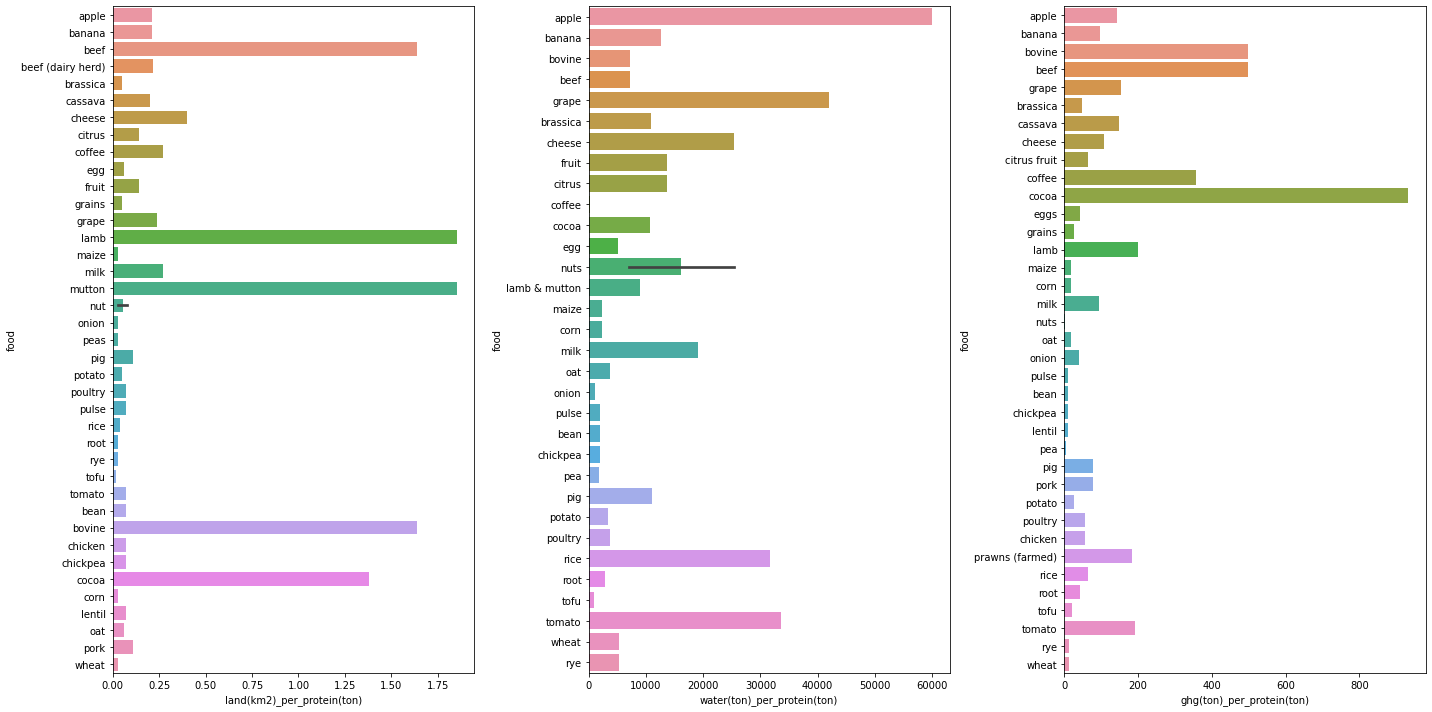

In [ ]:
# plt.subplot(rows, cols, graph pos)
plt.figure(figsize = (20,10))
plt.subplot(1,3,1)
sns.barplot(data=land_protein, x='land(km2)_per_protein(ton)', y='food')
plt.subplot(1,3,2)
sns.barplot(data=water_protein, x='water(ton)_per_protein(ton)', y='food')
plt.subplot(1,3,3)
sns.barplot(data=ghg_protein, x='ghg(ton)_per_protein(ton)', y='food')
plt.tight_layout()

In [ ]:
# merging the 3 dataframes in order to get
protein_merge = pd.merge(land_protein, water_protein, how='inner', on='food')
protein_merge = pd.merge(protein_merge, ghg_protein, how='inner', on='food')
protein_merge.drop(protein_merge.columns[[1,3,5]], axis = 1, inplace=True)
protein_merge.head()

,food,land(km2)_per_protein(ton),water(ton)_per_protein(ton),ghg(ton)_per_protein(ton)
0,apple,0.21,60033.33,143.33
1,banana,0.21,12722.22,95.56
2,beef,1.64,7277.83,498.90
3,brassica,0.05,10854.55,46.36
4,cheese,0.40,25385.87,108.15


In [ ]:
# seeing correlation between vars
protein_corr = protein_merge.corr()
protein_corr.style.background_gradient(cmap='coolwarm')

,land(km2)_per_protein(ton),water(ton)_per_protein(ton),ghg(ton)_per_protein(ton)
land(km2)_per_protein(ton),1.000000,0.010613,0.868887
water(ton)_per_protein(ton),0.010613,1.000000,0.082816
ghg(ton)_per_protein(ton),0.868887,0.082816,1.000000


[Text(0, 0.5, 'land(km2)_per_protein(ton)'),
 Text(0, 1.5, 'water(ton)_per_protein(ton)'),
 Text(0, 2.5, 'ghg(ton)_per_protein(ton)')]

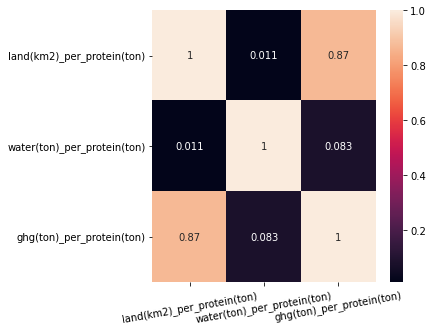

In [ ]:
plt.figure(figsize = (5,5))
ax = sns.heatmap(protein_corr, annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 10)
ax.set_yticklabels(ax.get_yticklabels(),rotation = 0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

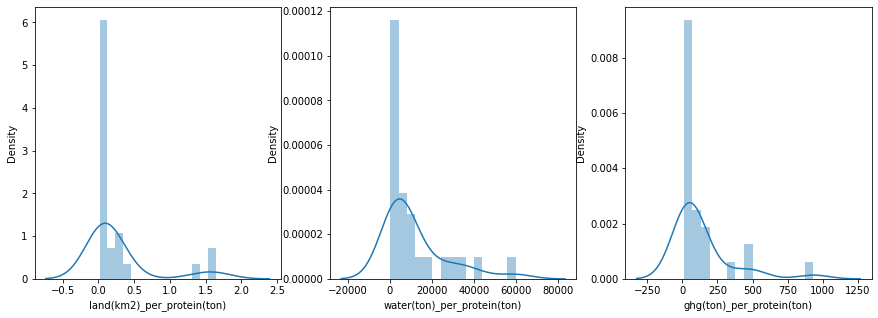

In [ ]:
# sns.displot(data=protein, x="m2_per_100gr_of_protein")
fig = plt.figure(figsize = (15, 5))
plt.subplot(1,3,1)
sns.distplot(protein_merge.iloc[:, 1], kde=True, bins=15, label='land_use');
plt.subplot(1,3,2)
sns.distplot(protein_merge.iloc[:, 2], kde=True, bins=15, label='land_use');
plt.subplot(1,3,3)
sns.distplot(protein_merge.iloc[:, 3], kde=True, bins=15, label='land_use');
# protein.head()

In [ ]:
protein_merge.head()

,food,land(km2)_per_protein(ton),water(ton)_per_protein(ton),ghg(ton)_per_protein(ton)
0,apple,0.21,60033.33,143.33
1,banana,0.21,12722.22,95.56
2,beef,1.64,7277.83,498.90
3,brassica,0.05,10854.55,46.36
4,cheese,0.40,25385.87,108.15


In [ ]:
# so land and water cols data have the less correlation value, let's do a simple prediction using a ML regressor with neural network
# let's predict water value (independant var) given land and ghg data (dependants)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
protein_merge.head(2)

,food,land(km2)_per_protein(ton),water(ton)_per_protein(ton),ghg(ton)_per_protein(ton)
0,apple,0.21,60033.33,143.33
1,banana,0.21,12722.22,95.56


In [ ]:
# protein_merge["land(km2)_per_protein(ton)"]
data = protein_merge.drop("food", axis=1)
x=data.drop("water(ton)_per_protein(ton)", axis=1)
y=data["water(ton)_per_protein(ton)"]

In [ ]:
iters = 0
while True:
  trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

  sc=StandardScaler()

  scaler = sc.fit(trainX)
  trainX_scaled = scaler.transform(trainX)
  testX_scaled = scaler.transform(testX)
  mlp_reg = MLPRegressor(hidden_layer_sizes=(3,3),solver = 'lbfgs',alpha=1e-5,random_state=1,max_iter = 300)
  mlp_reg.fit(trainX_scaled, trainY)
  score = mlp_reg.score(trainX_scaled, trainY)
  iters = iters+1
  if(score > 0.95 or iters == 50):
    print(score)
    print(iters)
    break


0.01567447429361779
50


In [ ]:
print(mlp_reg.score(trainX_scaled, trainY))

0.01567447429361779


In [ ]:
y_pred = mlp_reg.predict(testX_scaled)

In [ ]:
df_temp = pd.DataFrame({'Actual': testY, 'Predicted': y_pred})
df_temp.head()

,Actual,Predicted
20,7277.83,8598.040172
3,10854.55,11066.163685
6,41960.00,11645.146769
8,19036.36,10492.302593
9,1100.00,11060.504266


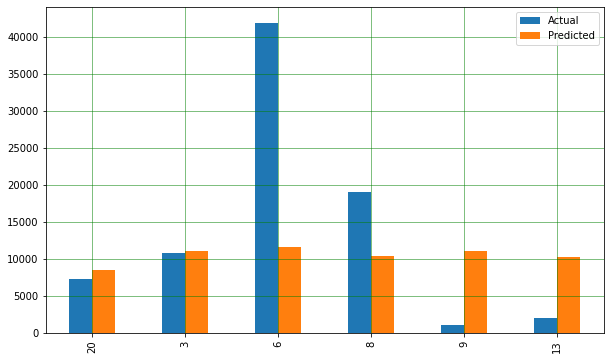

In [ ]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, y_pred)))

Mean Absolute Error: 9770.815621881058
Mean Squared Error: 193573998.40778247
Root Mean Squared Error: 13913.087306841084


In [ ]:
# so land and water cols data have the less correlation value, let's do a simple prediction using a ML regressor with neural network
# let's predict water value (independant var) given land and ghg data (dependants)
from sklearn.linear_model import LinearRegression

In [ ]:
fao_food.head()

,Country,Item,Type,Unit,1961,1962,1963,1964,1965,1966,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Wheat and products,Food,1000 tonnes,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes,183.0,183.0,182.0,220.0,220.0,195.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,Afghanistan,Barley and products,Feed,1000 tonnes,76.0,76.0,76.0,76.0,76.0,75.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,Afghanistan,Barley and products,Food,1000 tonnes,237.0,237.0,237.0,238.0,238.0,237.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,Afghanistan,Maize and products,Feed,1000 tonnes,210.0,210.0,214.0,216.0,216.0,216.0,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [ ]:
# let's predict a food's yield (food not feed) in the future for a certain country for exanple "Wheat and products" in Afghanistan
# timeline
X = np.array(years).reshape(-1,1)
# food production
y = np.array(fao_food.iloc[:1, 4:])[0].reshape(-1,1)
print('years ', X[1:5])
print('Wheat and products - Afg ', y[1:5])

years  [['1962']
 ['1963']
 ['1964']
 ['1965']]
Wheat and products - Afg  [[1904.]
 [1666.]
 [1950.]
 [2001.]]


In [ ]:
iters = 0
while True:
  model = LinearRegression()
  iters = iters + 1 
  train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
  model.fit(train_X, train_y)
  # model_score = model.score(train_X, train_y)
  model_score = model.score(train_X, train_y)
  if (model_score > 0.7 or iters == 50):
    print(model_score)
    print(iters)
    break

0.4888803028261365
50


In [ ]:
test_y_pred = model.predict(test_X)

In [ ]:
print('r2_train = ',model_score)
print('r2_pred = ', metrics.r2_score(test_y, test_y_pred))

r2_train =  0.4888803028261365
r2_pred =  0.5292512911225561


In [ ]:
print(model.predict([[2020]]))

[[3963.56272293]]


In [ ]:
fao_food.reset_index(drop=True, inplace=True)

In [ ]:
food = 'Meat'
country = 'Spain'
filter = fao_food['Item'].str.contains(food) & fao_food['Country'].str.contains(country)
fao_food[filter]
# print(fao_food[filter])
index = fao_food[filter].index[0]
print(index)
# np.array(fao_food.iloc[:1, 4:])[0]
# fao_food.iloc[47:48]

17529


In [ ]:
# np.array(fao_food.iloc[20475:])[0]
fao_food.iloc[index:(index+1)]

,Country,Item,Type,Unit,1961,1962,1963,1964,1965,1966,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
17529,Spain,Bovine Meat,Food,1000 tonnes,184.0,209.0,263.0,252.0,254.0,288.0,...,669.0,677.0,673.0,666.0,666.0,650.0,632.0,606.0,581,570


In [ ]:
# r2 score of aprox 0.5 it's like flipping a coin so it's not a good model.
# Polynomial Lineal Regression 
# Predicting again food's yield (food not feed) in the future for a certain country for example "Wheat and products" or "Meat" in Afghanistan or US, even China
# sample Polynomial equation
# y = ß0 + ß1x + ß2x2

# timeline with 1D array
x_data = np.array(years)
# food production also 1D array
y_data = np.array(fao_food.iloc[index:(index+1), 4:])[0]
# print('years ', X[1:5])
# print('Wheat and products - Afg ', y[1:5])



In [ ]:
# resetting X and y to 2D arrays
X = x_data.reshape(-1,1)
y = y_data.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression(fit_intercept=False))])
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

poly.fit(train_X, train_y)
poly.score(X,y)
model_score = poly.score(train_X, train_y)
print(model_score)
# poly = PolynomialFeatures(degree=2, include_bias=False)
# poly_features = poly.fit_transform(X)
# poly_reg_model = LinearRegression()
# poly_reg_model.fit(poly_features, y)
y_predicted = poly.predict(X)

0.9211299470378008


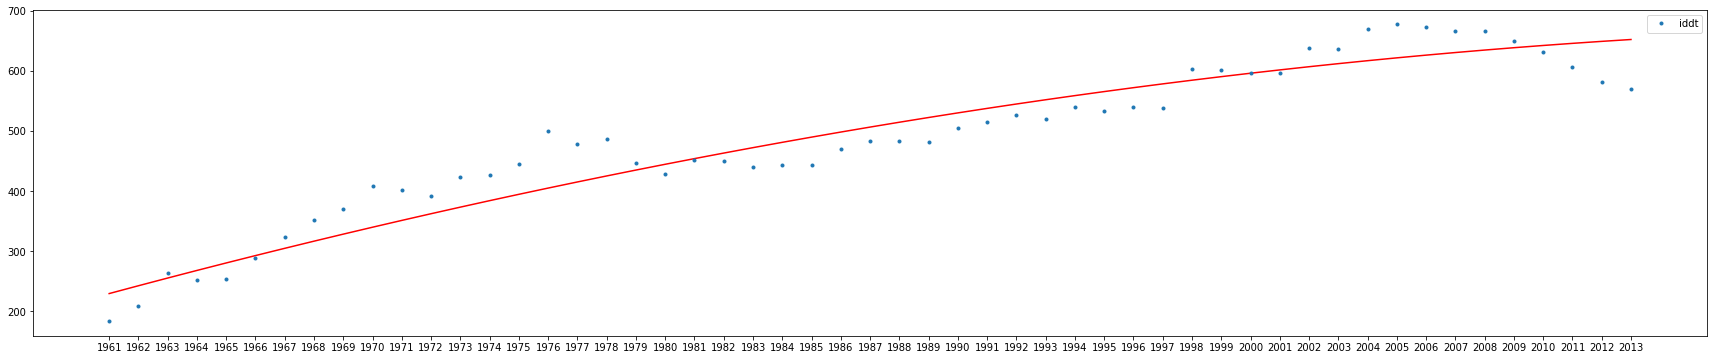

In [ ]:
y_predicted_1d = y_predicted.reshape(1, 53)[0]
fig, ax = plt.subplots(1,1, figsize=(30,6))
# ax.plot(x_data, y_predicted_1d, ls='', marker='*', label='predicted')
ax.plot(x_data, y_predicted_1d, c="red")
ax.plot(x_data, y, ls='', marker='.', label='iddt')
ax.legend()

# plt.figure(figsize=(10, 6))
# plt.scatter(x_data, y_data)
# plt.show()

In [ ]:
# Just watching the numbers of this food for human consumption it's insane, but we are not including human population number and it's projection for 2050
poly.predict([[2014], [2020], [2025], [2030], [2050]])

array([[654.91258906],
       [668.10594687],
       [673.49005423],
       [673.73317133],
       [622.53326301]])

In [ ]:
# let's run a classification model, to determine which foods are more efficient in terms of water use, land use and ghg emissions values


In [ ]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=100, random_state=1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

# clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
# clf.predict_proba(X_test[:1])
# clf.predict(X_test[:5, :])
# print(clf.score(X_test, y_test))